In [157]:
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import io
import matplotlib.pyplot as plt
%matplotlib inline
import time
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [205]:
#data from Kaggle
df=pd.read_csv('data/insurance_fraud_claims.csv')


In [206]:
df.head(5)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

## Exploratory data analysis

In [ ]:
#describe the data

In [67]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [68]:
df.head(10)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
5,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,...,5 years,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
6,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,...,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
8,Dec,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,...,6 years,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,1994,Collision
9,Apr,3,Tuesday,Ford,Urban,Wednesday,Apr,3,Male,Married,...,more than 7,36 to 40,No,No,External,3 to 5,no change,1 vehicle,1994,All Perils


## Data Cleaning

In [69]:
df.isna().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [70]:
## no null value found in data
# check if any dup values
print(len(df.drop_duplicates())==len(df))

True


In [71]:
# No dup data found in dataset since after drop dup and len of original data set is same


In [72]:
# These variable can be dropped as it does not add any value
df=df.drop(["Month",'DayOfWeek',"DayOfWeekClaimed",'Make','MonthClaimed',"PolicyNumber",'RepNumber'],axis=1)

In [73]:
# Shape of dataframe
df.shape

(15420, 26)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   WeekOfMonth           15420 non-null  int64 
 1   AccidentArea          15420 non-null  object
 2   WeekOfMonthClaimed    15420 non-null  int64 
 3   Sex                   15420 non-null  object
 4   MaritalStatus         15420 non-null  object
 5   Age                   15420 non-null  int64 
 6   Fault                 15420 non-null  object
 7   PolicyType            15420 non-null  object
 8   VehicleCategory       15420 non-null  object
 9   VehiclePrice          15420 non-null  object
 10  FraudFound_P          15420 non-null  int64 
 11  Deductible            15420 non-null  int64 
 12  DriverRating          15420 non-null  int64 
 13  Days_Policy_Accident  15420 non-null  object
 14  Days_Policy_Claim     15420 non-null  object
 15  PastNumberOfClaims    15420 non-null

## Exploratory Data Analysis (EDA) 

### Total Data Records : 15420
### Explanatory variables : 26
### Output Variable Fraud Found : 1


## Total Fraud found in dataset

In [78]:
fraud_counts = df['FraudFound_P'].value_counts()

In [79]:
fraud_counts

0    14497
1      923
Name: FraudFound_P, dtype: int64

In [62]:
df.columns

Index(['WeekOfMonth', 'AccidentArea', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'Deductible', 'DriverRating',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy'],
      dtype='object')

### Categorical Data

In [81]:
cat_cols = [col for col in df.columns if col not in df.describe().columns]
cat_cols

['AccidentArea',
 'Sex',
 'MaritalStatus',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'BasePolicy']

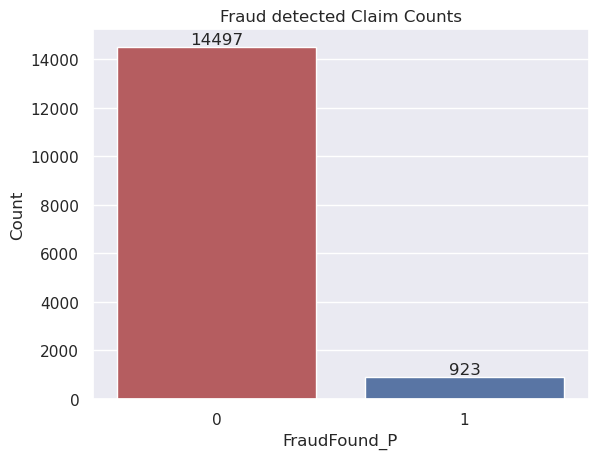

In [99]:
sns.set()
ax=sns.countplot(x ="FraudFound_P", data=df, palette=['r','b']);
ax.set(xlabel ="FraudFound_P", ylabel = "Count", title ='Fraud detected Claim Counts')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

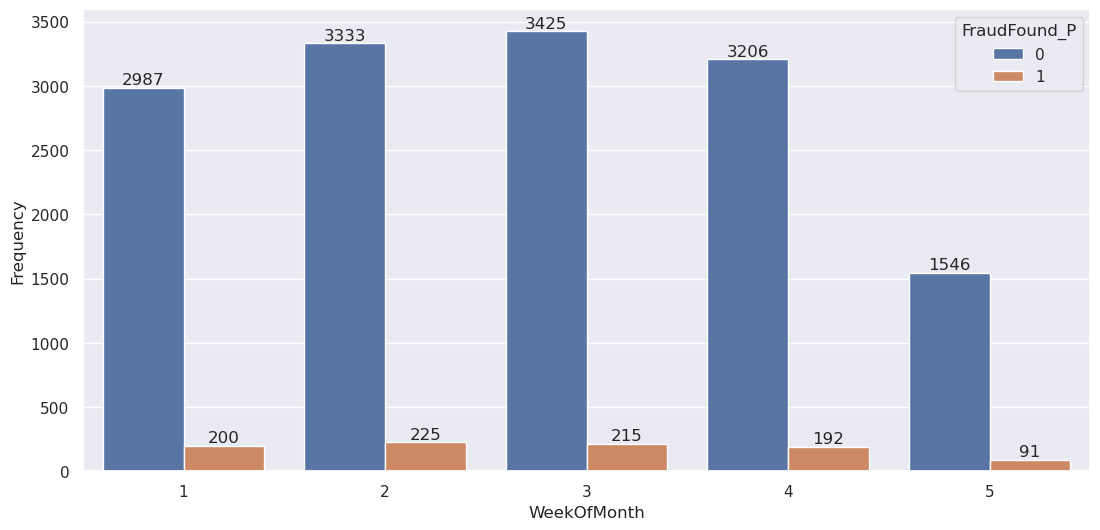

In [100]:
plt.figure(figsize = (13,6))
ax=sns.countplot( x= df['WeekOfMonth'], hue = 'FraudFound_P', data = df)
plt.xlabel('WeekOfMonth')
plt.ylabel('Frequency')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

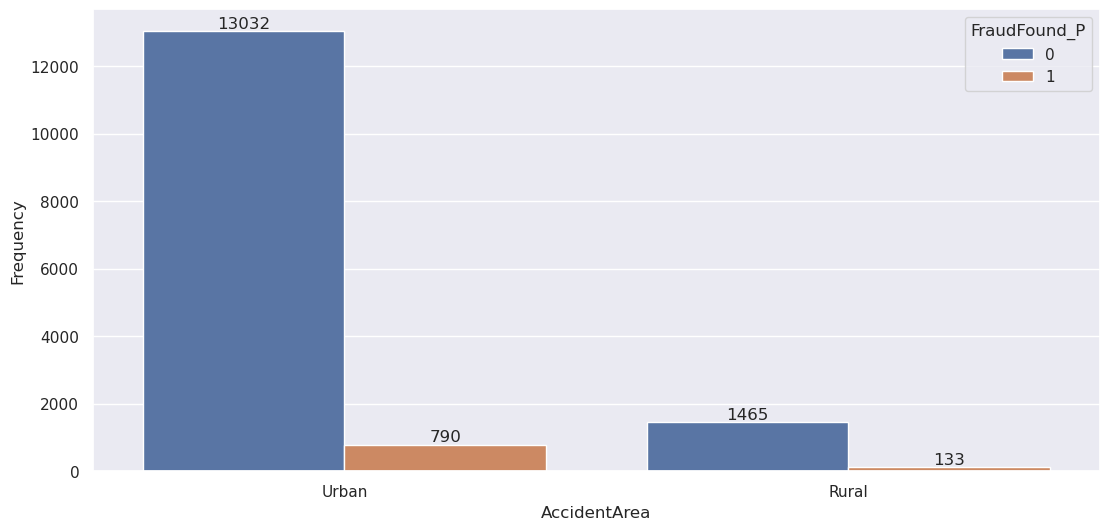

In [98]:
plt.figure(figsize = (13,6))
ax=sns.countplot( x= df['AccidentArea'], hue = 'FraudFound_P', data = df)
plt.xlabel('AccidentArea')
plt.ylabel('Frequency')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

#### No fraud detected in Rural Area

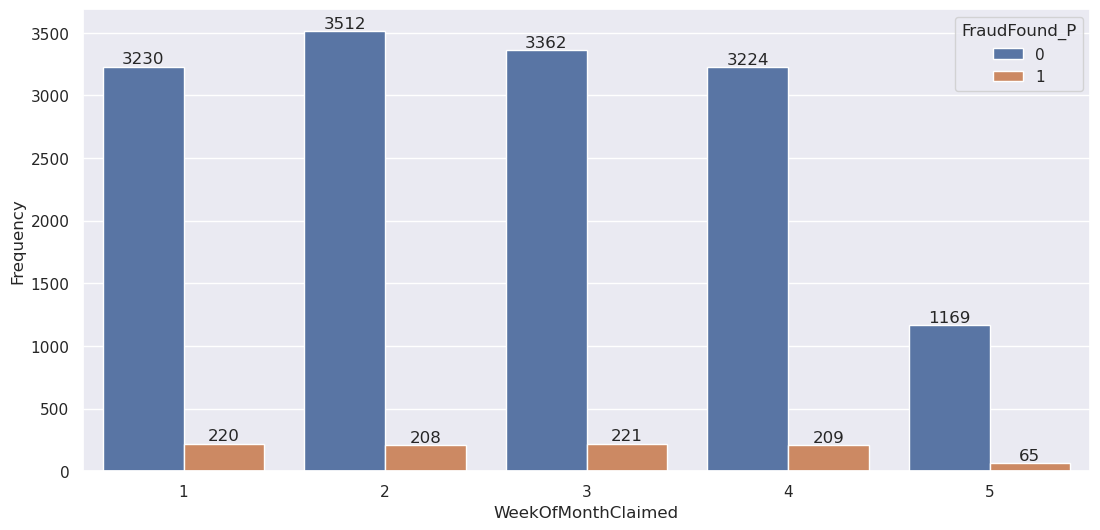

In [96]:
plt.figure(figsize = (13,6))
ax=sns.countplot( x= df['WeekOfMonthClaimed'], hue = 'FraudFound_P', data = df)
plt.xlabel('WeekOfMonthClaimed')
plt.ylabel('Frequency')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

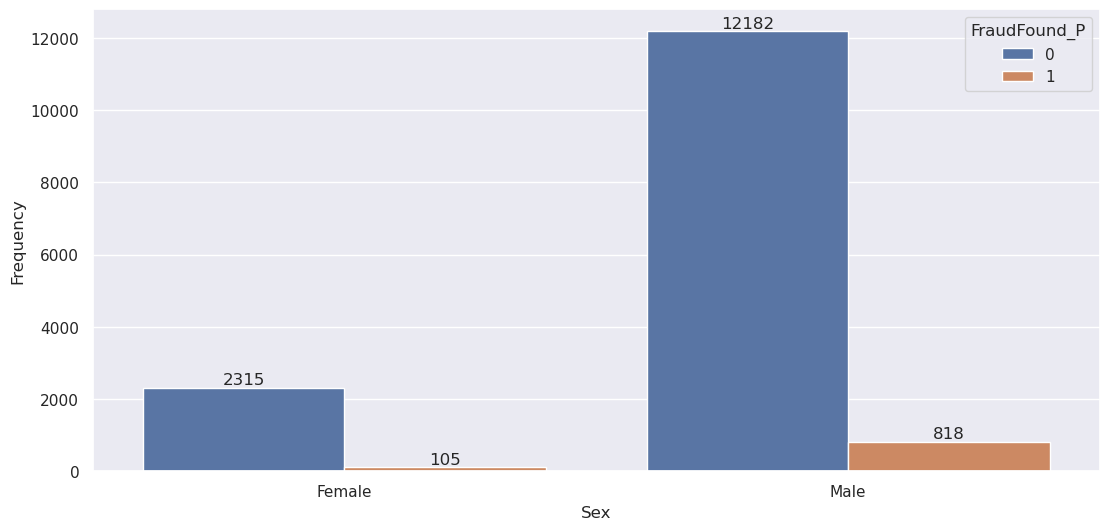

In [97]:
plt.figure(figsize = (13,6))
ax=sns.countplot( x= df['Sex'], hue = 'FraudFound_P', data = df)
plt.xlabel('Sex')
plt.ylabel('Frequency')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [87]:
### above data shows male committing more fraud than female

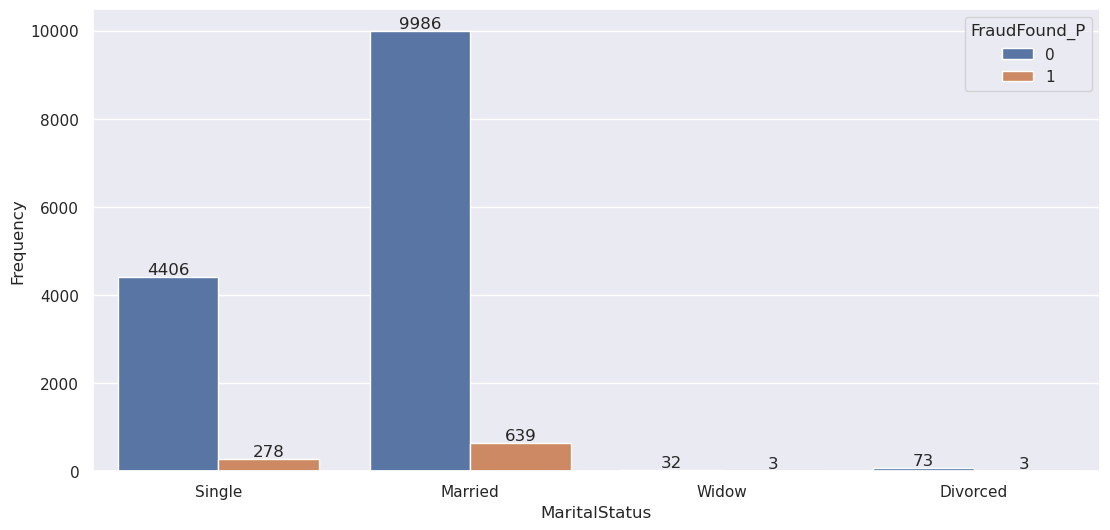

In [102]:
plt.figure(figsize = (13,6))
ax=sns.countplot( x= df['MaritalStatus'], hue = 'FraudFound_P', data = df)
plt.xlabel('MaritalStatus')
plt.ylabel('Frequency')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

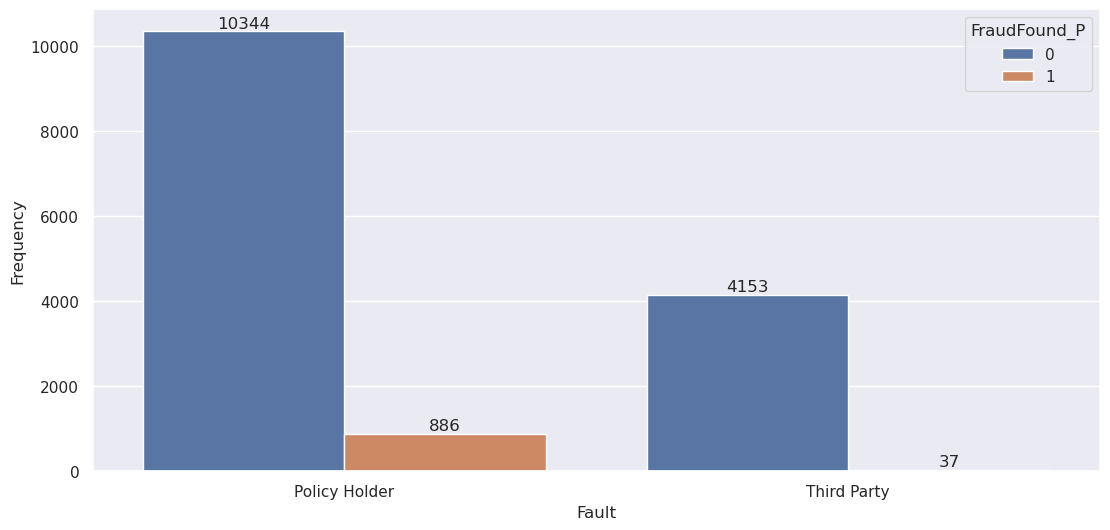

In [103]:
plt.figure(figsize = (13,6))
ax=sns.countplot( x= df['Fault'], hue = 'FraudFound_P', data = df)
plt.xlabel('Fault')
plt.ylabel('Frequency')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

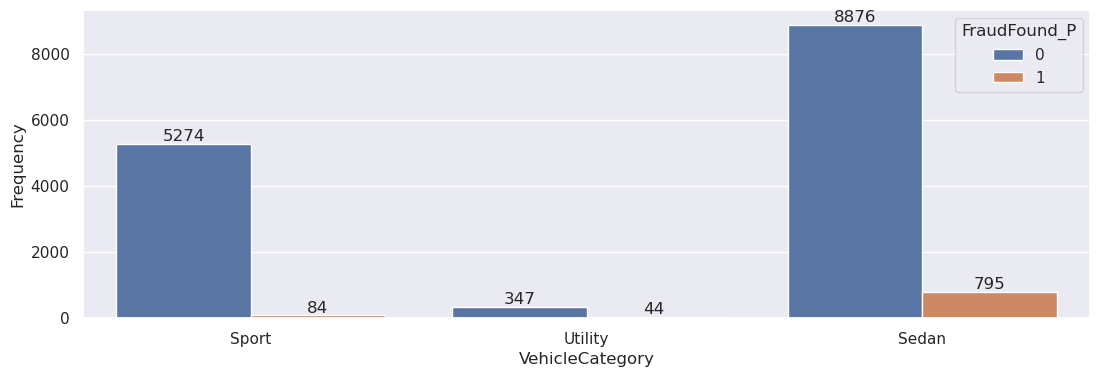

In [116]:
plt.figure(figsize = (13,4))
ax=sns.countplot( x= df['VehicleCategory'], hue = 'FraudFound_P', data = df)
plt.xlabel('VehicleCategory')
plt.ylabel('Frequency')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

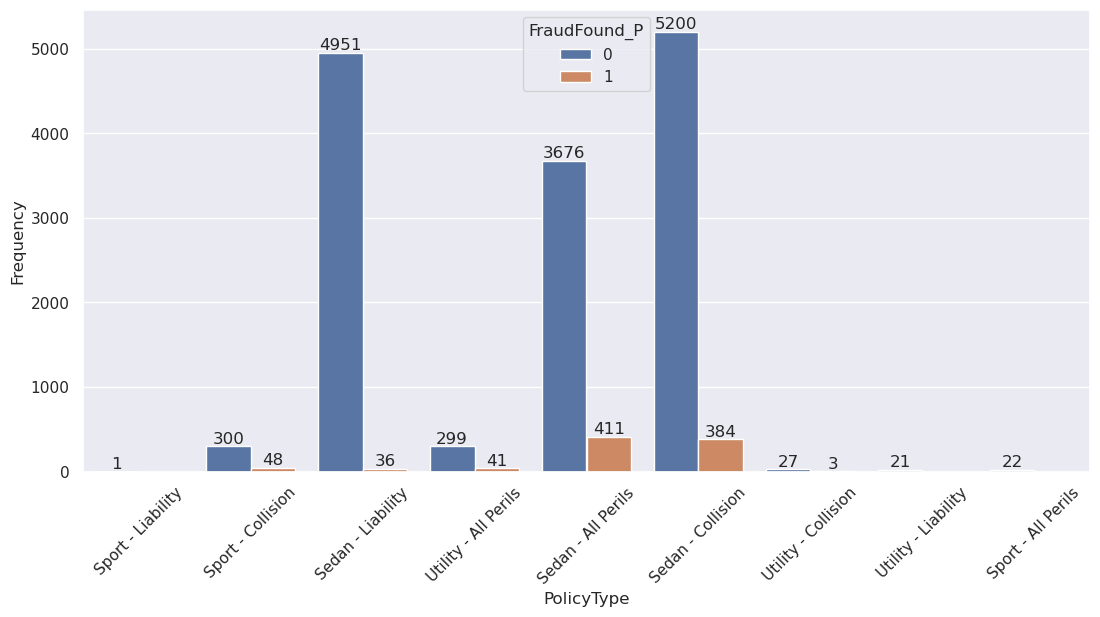

In [118]:
plt.figure(figsize = (13,6))
ax=sns.countplot( x= df['PolicyType'], hue = 'FraudFound_P', data = df)
plt.xlabel('PolicyType')
plt.ylabel('Frequency')
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

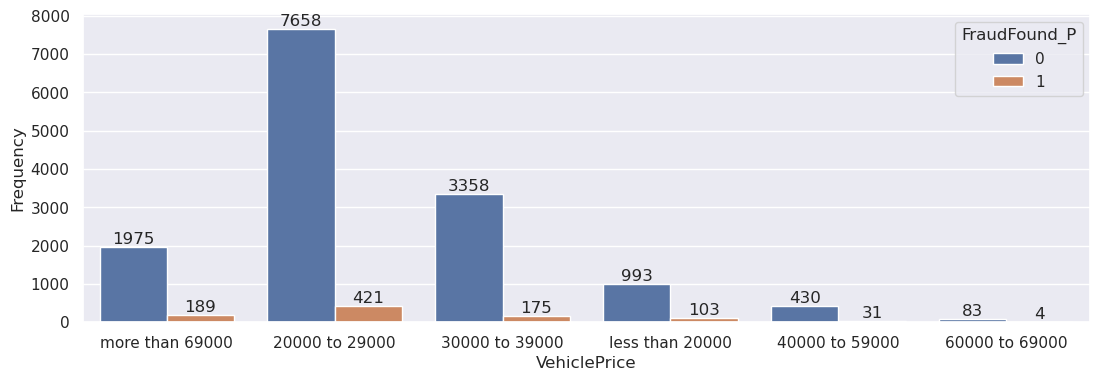

In [119]:
plt.figure(figsize = (13,4))
ax=sns.countplot( x= df['VehiclePrice'], hue = 'FraudFound_P', data = df)
plt.xlabel('VehiclePrice')
plt.ylabel('Frequency')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

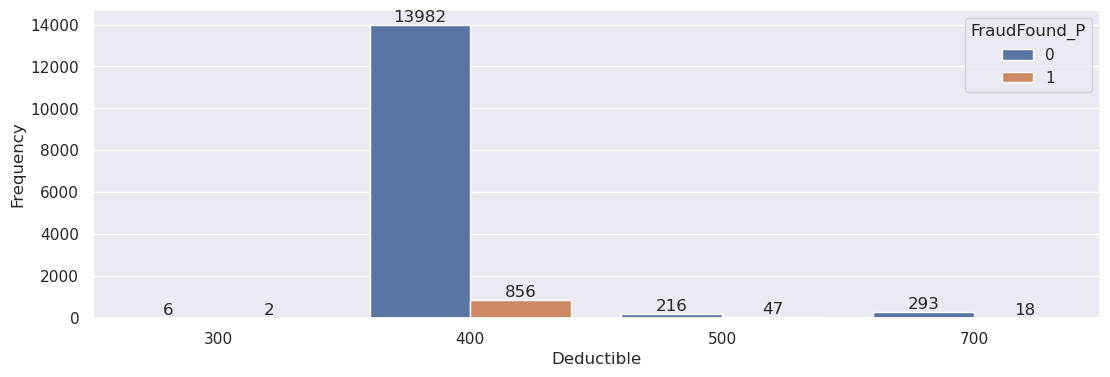

In [127]:
plt.figure(figsize = (13,4))
ax=sns.countplot( x= df['Deductible'], hue = 'FraudFound_P', data = df)
plt.xlabel('Deductible')
plt.ylabel('Frequency')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

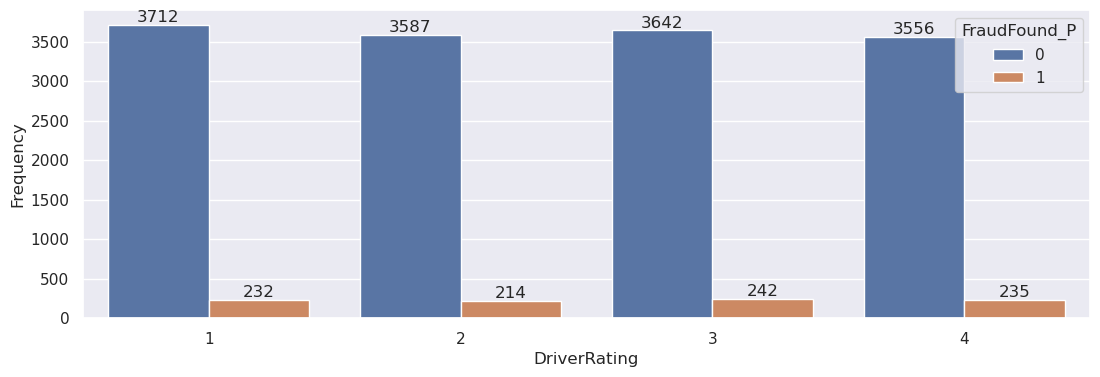

In [136]:
plt.figure(figsize = (13,4))
ax=sns.countplot( x= df['DriverRating'], hue = 'FraudFound_P', data = df)
plt.xlabel('DriverRating')
plt.ylabel('Frequency')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

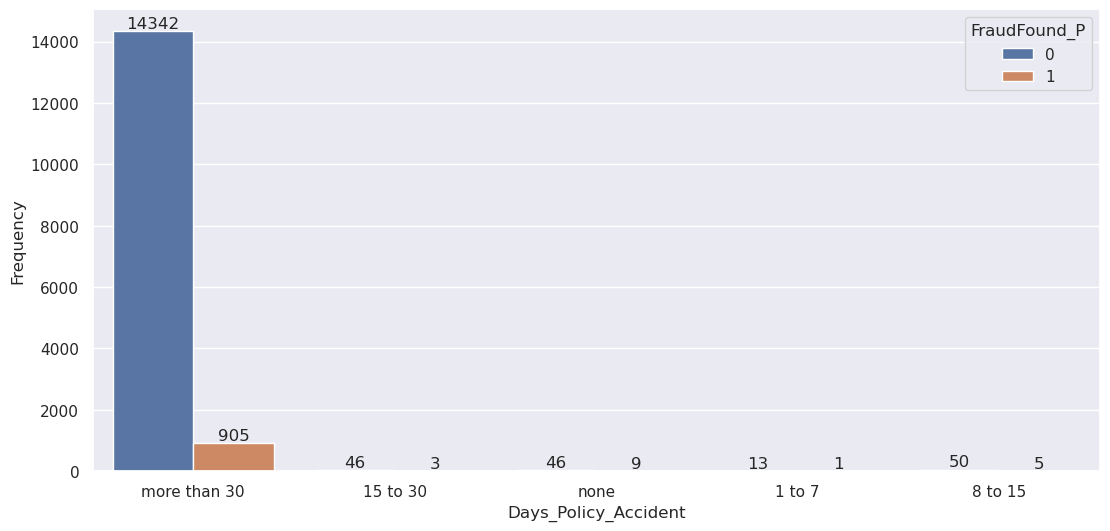

In [137]:
plt.figure(figsize = (13,6))
ax=sns.countplot( x= df['Days_Policy_Accident'], hue = 'FraudFound_P', data = df)
plt.xlabel('Days_Policy_Accident')
plt.ylabel('Frequency')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

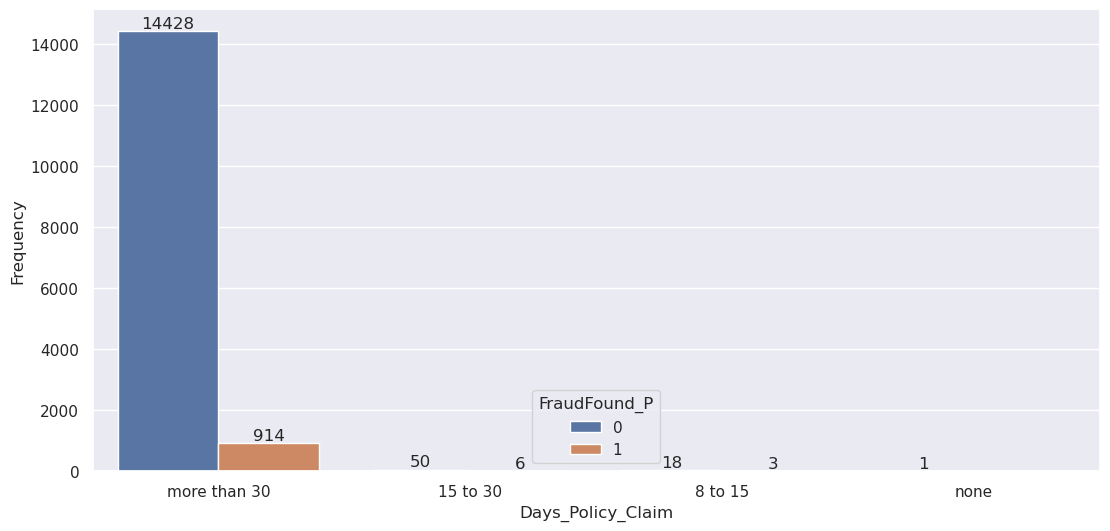

In [140]:
plt.figure(figsize = (13,6))
ax=sns.countplot( x= df['Days_Policy_Claim'], hue = 'FraudFound_P', data = df)
plt.xlabel('Days_Policy_Claim')
plt.ylabel('Frequency')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

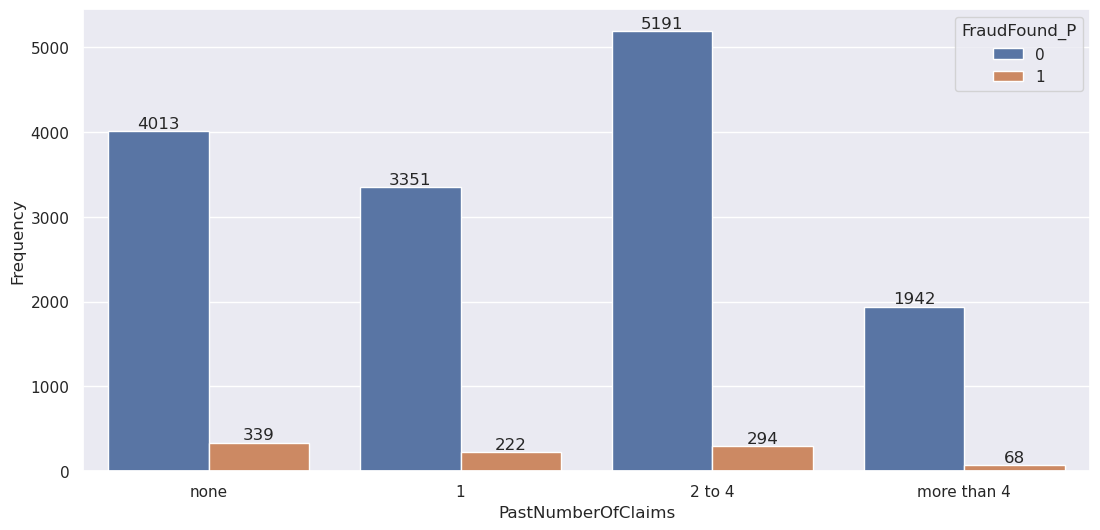

In [141]:
plt.figure(figsize = (13,6))
ax=sns.countplot( x= df['PastNumberOfClaims'], hue = 'FraudFound_P', data = df)
plt.xlabel('PastNumberOfClaims')
plt.ylabel('Frequency')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

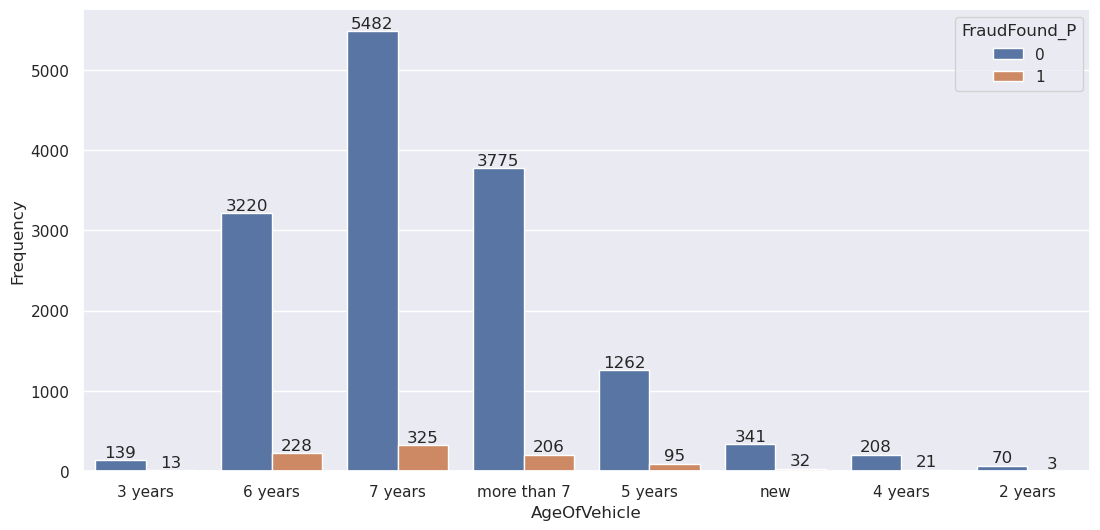

In [142]:
plt.figure(figsize = (13,6))
ax=sns.countplot( x= df['AgeOfVehicle'], hue = 'FraudFound_P', data = df)
plt.xlabel('AgeOfVehicle')
plt.ylabel('Frequency')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

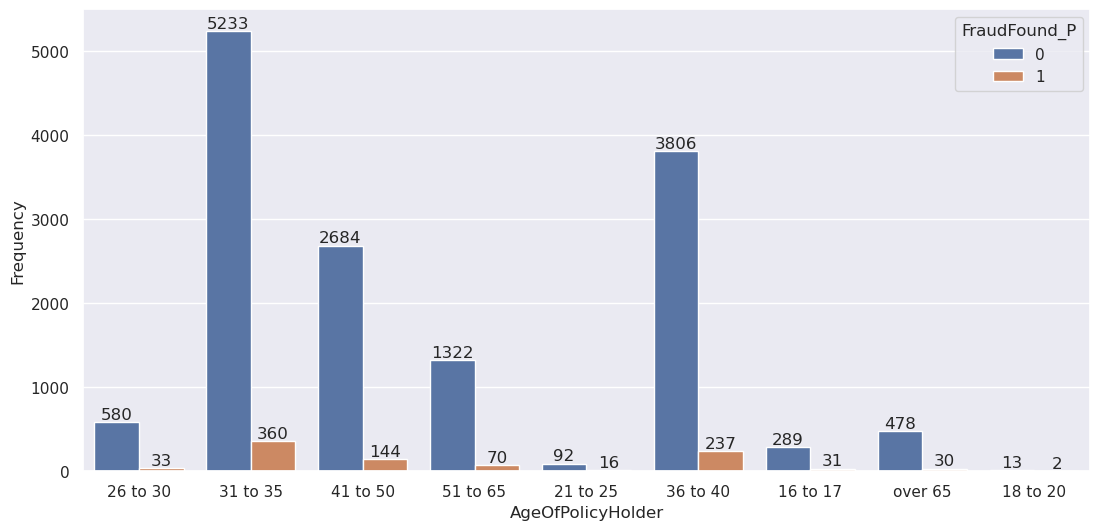

In [143]:
plt.figure(figsize = (13,6))
ax=sns.countplot( x= df['AgeOfPolicyHolder'], hue = 'FraudFound_P', data = df)
plt.xlabel('AgeOfPolicyHolder')
plt.ylabel('Frequency')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

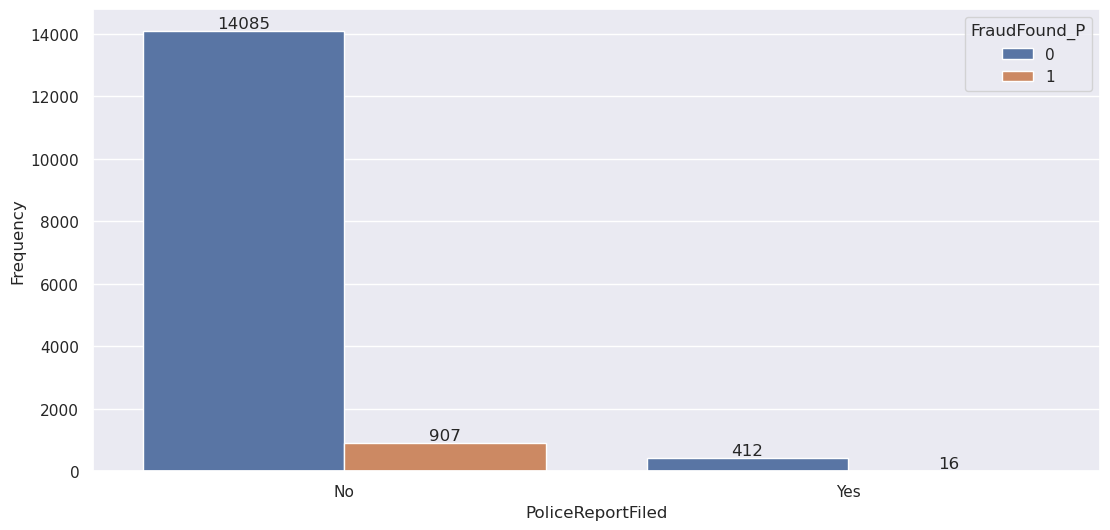

In [144]:
plt.figure(figsize = (13,6))
ax=sns.countplot( x= df['PoliceReportFiled'], hue = 'FraudFound_P', data = df)
plt.xlabel('PoliceReportFiled')
plt.ylabel('Frequency')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

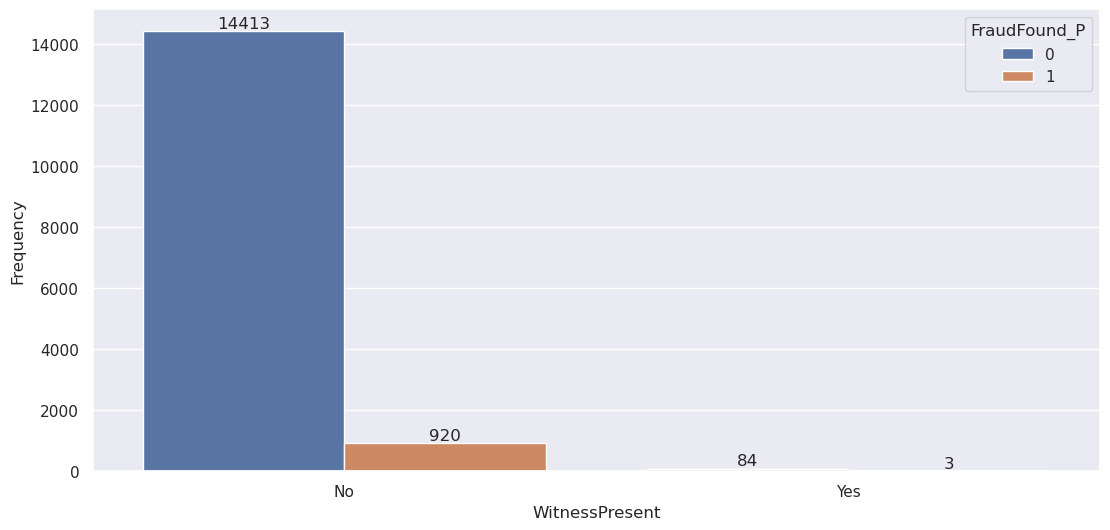

In [145]:
plt.figure(figsize = (13,6))
ax=sns.countplot( x= df['WitnessPresent'], hue = 'FraudFound_P', data = df)
plt.xlabel('WitnessPresent')
plt.ylabel('Frequency')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

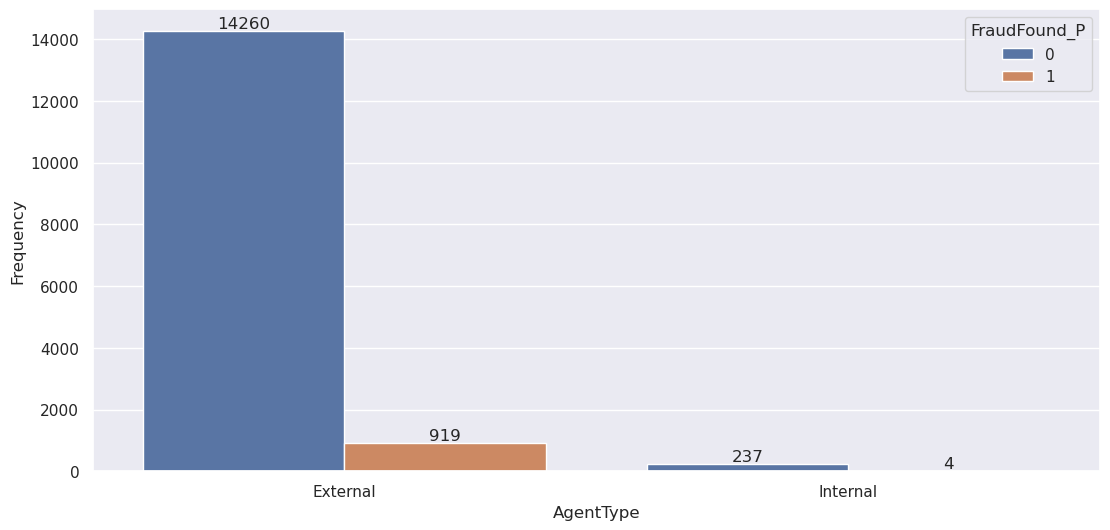

In [146]:
plt.figure(figsize = (13,6))
ax=sns.countplot( x= df['AgentType'], hue = 'FraudFound_P', data = df)
plt.xlabel('AgentType')
plt.ylabel('Frequency')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

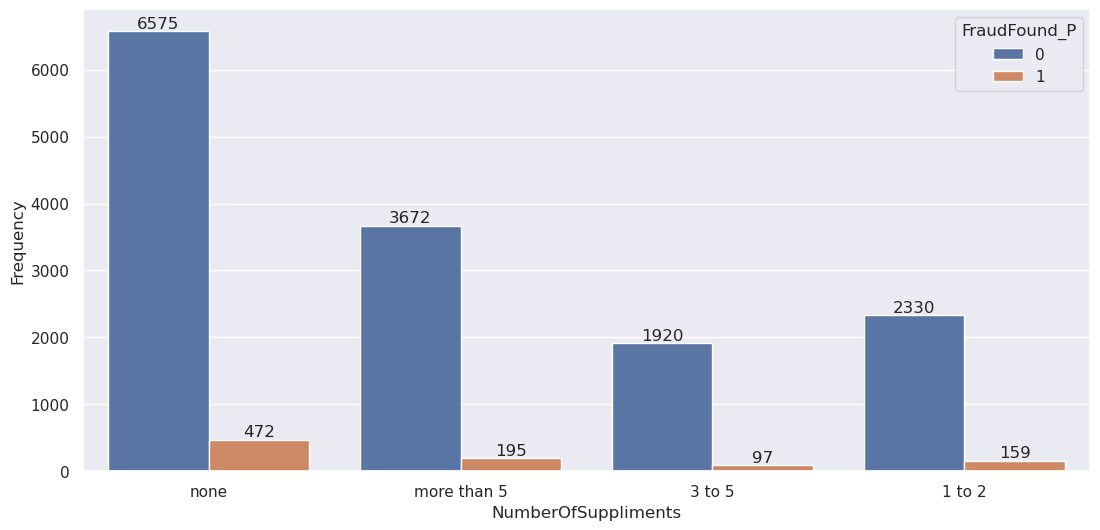

In [147]:
plt.figure(figsize = (13,6))
ax=sns.countplot( x= df['NumberOfSuppliments'], hue = 'FraudFound_P', data = df)
plt.xlabel('NumberOfSuppliments')
plt.ylabel('Frequency')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

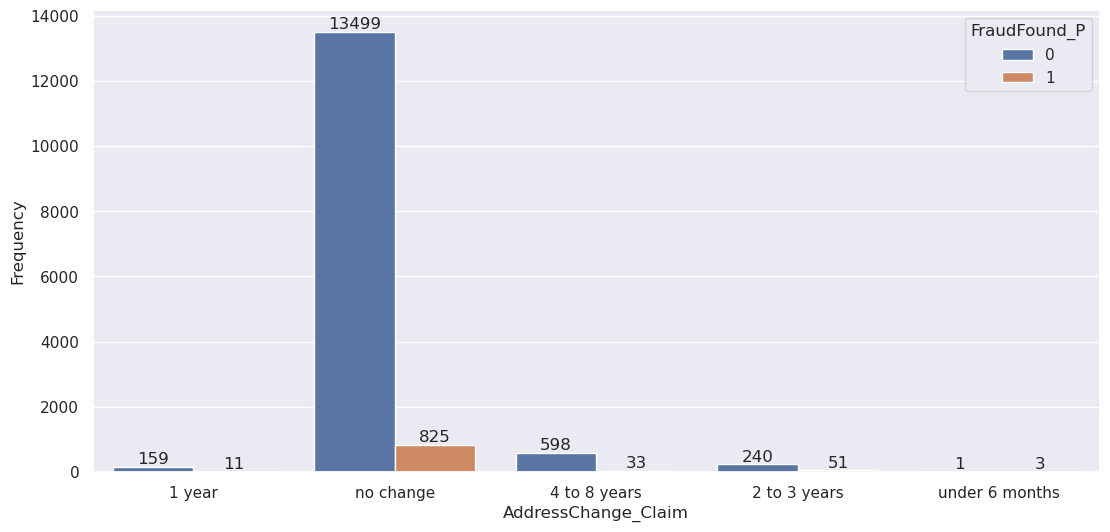

In [148]:
plt.figure(figsize = (13,6))
ax=sns.countplot( x= df['AddressChange_Claim'], hue = 'FraudFound_P', data = df)
plt.xlabel('AddressChange_Claim')
plt.ylabel('Frequency')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

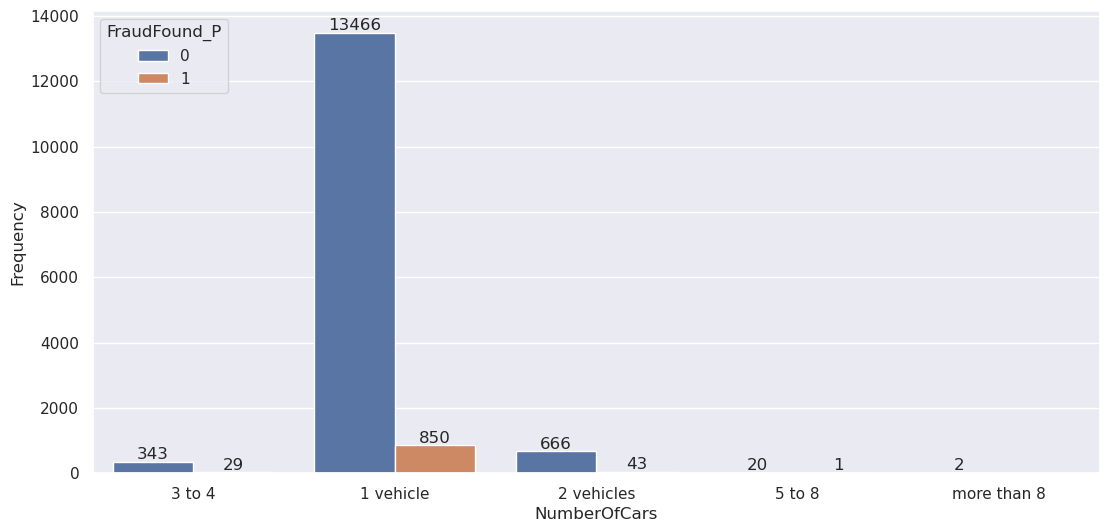

In [149]:
plt.figure(figsize = (13,6))
ax=sns.countplot( x= df['NumberOfCars'], hue = 'FraudFound_P', data = df)
plt.xlabel('NumberOfCars')
plt.ylabel('Frequency')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

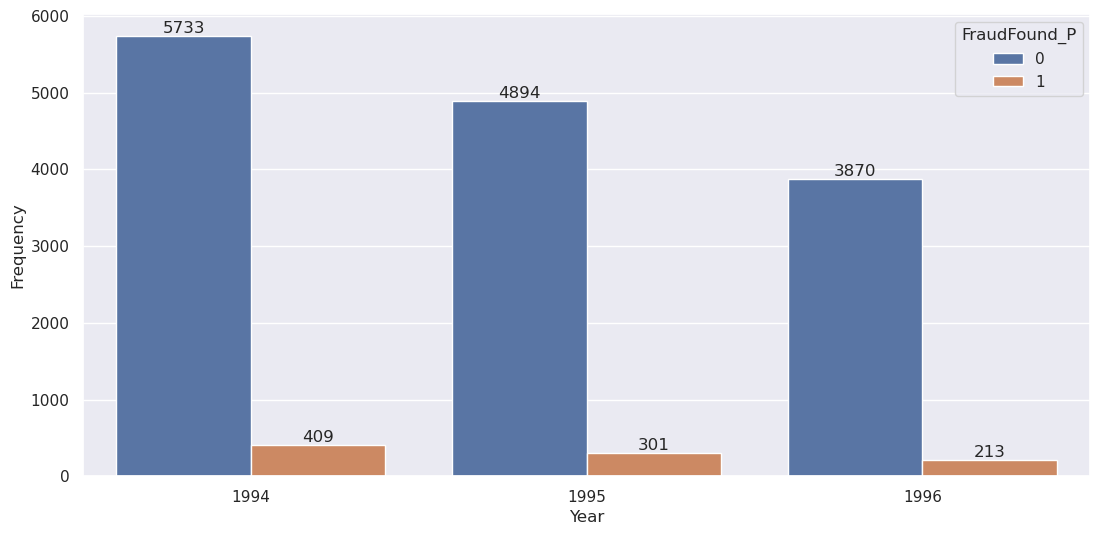

In [150]:
plt.figure(figsize = (13,6))
ax=sns.countplot( x= df['Year'], hue = 'FraudFound_P', data = df)
plt.xlabel('Year')
plt.ylabel('Frequency')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

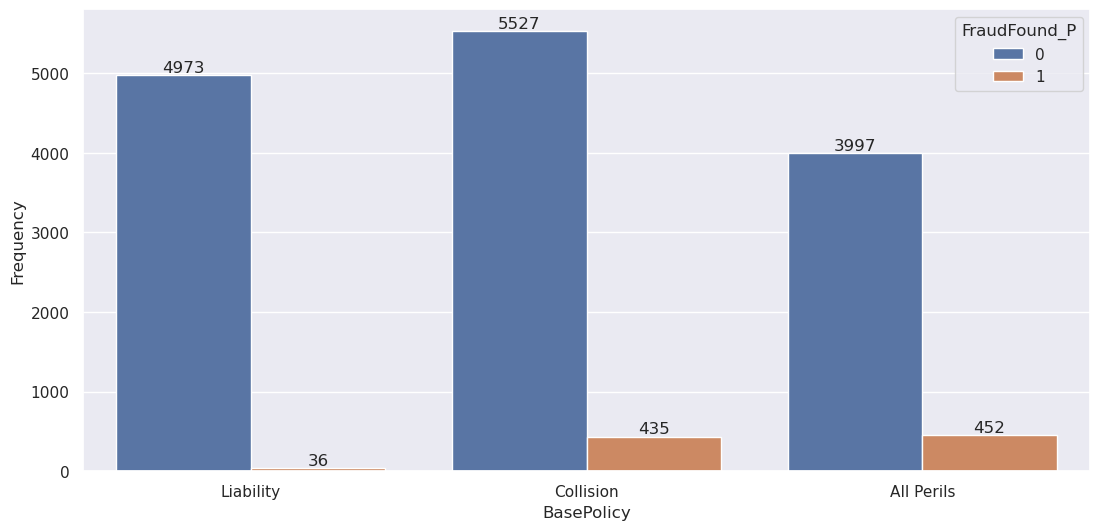

In [151]:
plt.figure(figsize = (13,6))
ax=sns.countplot( x= df['BasePolicy'], hue = 'FraudFound_P', data = df)
plt.xlabel('BasePolicy')
plt.ylabel('Frequency')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

<AxesSubplot:title={'center':'Age'}, xlabel='FraudFound_P'>

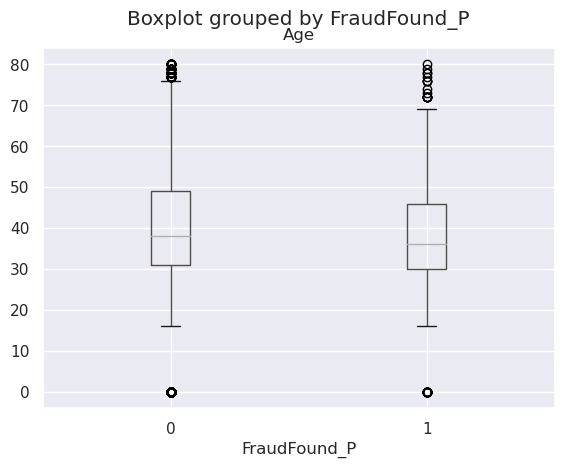

In [152]:
df.boxplot(column='Age',by='FraudFound_P')

### Standarize the Numeric Variable

In [158]:
scaler = StandardScaler()
df[["Age"]]=scaler.fit_transform(df[["Age"]])
df[["Age"]]

,Age
0,-1.397554
1,-0.434015
2,0.529523
3,1.863653
4,-0.952844
...,...
15415,-0.359897
15416,-0.730489
15417,-1.175199
15418,-0.434015


### Encoding the Categorical Variable 

In [160]:
df = df[df.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'Urban':1,'Rural':0,'Policy Holder':1,'Third Party':0,'External':1,'Internal':0})
df=pd.get_dummies(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 82 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   WeekOfMonth                         15420 non-null  int64  
 1   AccidentArea                        15420 non-null  int64  
 2   WeekOfMonthClaimed                  15420 non-null  int64  
 3   Sex                                 15420 non-null  int64  
 4   Age                                 15420 non-null  float64
 5   Fault                               15420 non-null  int64  
 6   FraudFound_P                        15420 non-null  int64  
 7   Deductible                          15420 non-null  int64  
 8   DriverRating                        15420 non-null  int64  
 9   PoliceReportFiled                   15420 non-null  int64  
 10  WitnessPresent                      15420 non-null  int64  
 11  AgentType                           15420

In [163]:
df[['MaritalStatus_Divorced','MaritalStatus_Married','MaritalStatus_Single','MaritalStatus_Widow']]

,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow
0,0,0,1,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
15415,0,1,0,0
15416,0,1,0,0
15417,0,0,1,0
15418,0,1,0,0


In [164]:
#Since the design matrix becomes singular , we cant get the estimators. So we need to drop one 1 dummy variable from each catregory


In [165]:
df.iloc[:,14:82] = df.iloc[:,14:82].astype(np.int64)
df=df.drop(["MaritalStatus_Widow","PolicyType_Utility - Liability","VehicleCategory_Utility","VehiclePrice_more than 69000","Days_Policy_Accident_none","Days_Policy_Claim_none","PastNumberOfClaims_none","AgeOfVehicle_new","AgeOfPolicyHolder_over 65","NumberOfSuppliments_none","AddressChange_Claim_no change","NumberOfCars_more than 8","BasePolicy_Liability"],axis=1)
df.head()

,WeekOfMonth,AccidentArea,WeekOfMonthClaimed,Sex,Age,Fault,FraudFound_P,Deductible,DriverRating,PoliceReportFiled,...,AddressChange_Claim_1 year,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_under 6 months,NumberOfCars_1 vehicle,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,BasePolicy_All Perils,BasePolicy_Collision
0,5,1,1,0,-1.397554,1,0,300,1,0,...,1,0,0,0,0,0,1,0,0,0
1,3,1,4,1,-0.434015,1,0,400,4,1,...,0,0,0,0,1,0,0,0,0,1
2,5,1,2,1,0.529523,1,0,400,3,0,...,0,0,0,0,1,0,0,0,0,1
3,2,0,1,1,1.863653,0,0,400,2,1,...,0,0,0,0,1,0,0,0,0,0
4,5,1,2,0,-0.952844,0,0,400,1,0,...,0,0,0,0,1,0,0,0,0,1


In [166]:
### set the output variable
features = df.drop(columns =['FraudFound_P'], axis = 1)
target = df['FraudFound_P']

In [175]:
X=features
y=target

In [176]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size =0.2, random_state = 0)
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (12336, 68)
Shape of testing feature: (3084, 68)
Shape of training label: (12336,)
Shape of training label: (3084,)


In [177]:
from sklearn import neighbors

#K-Nearest Neighbors
print("KNN Score :")
KNNClassifier = neighbors.KNeighborsClassifier(n_neighbors=12, weights='distance')
KNNClassifier.fit(X=X_train,y=y_train)
KNNClassifier.score(X_test,y_test)

KNN Score :


0.9413099870298314

In [178]:
KNN_y_predicted = KNNClassifier.predict(X_test)
class_names = np.unique(np.array(y_test))
confusion_matrix(y_test, KNN_y_predicted)

array([[2900,    2],
       [ 179,    3]])

In [179]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

print(classification_report(y_test, KNN_y_predicted))

scores = cross_val_score(KNNClassifier, X, y, cv=10, scoring='accuracy')
knn_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % knn_accuracy)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2902
           1       0.60      0.02      0.03       182

    accuracy                           0.94      3084
   macro avg       0.77      0.51      0.50      3084
weighted avg       0.92      0.94      0.91      3084

Cross-Validated Accuracy: 0.94


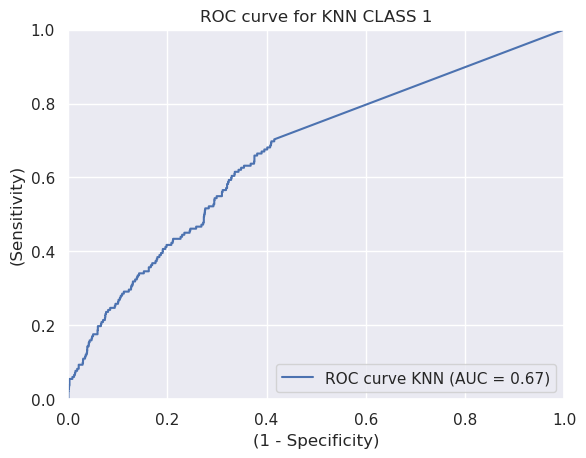

In [180]:
from sklearn.metrics import roc_curve, auc
knn_pred_prob = KNNClassifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, knn_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve KNN (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for KNN CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

In [181]:
from sklearn import tree

#DecisionTree
DTClassifier = tree.DecisionTreeClassifier()
DTClassifier.fit(X_train, y_train) 

print("Decision Tree Score :")
DTClassifier.score(X_test,y_test)

Decision Tree Score :


0.8962386511024644

In [182]:
DT_y_predicted = DTClassifier.predict(X_test)
class_names = np.unique(np.array(y_test))
confusion_matrix(y_test, DT_y_predicted)

array([[2726,  176],
       [ 144,   38]])

In [183]:
print(classification_report(y_test, DT_y_predicted))

scores = cross_val_score(DTClassifier, X, y, cv=10, scoring='accuracy')
dt_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % dt_accuracy)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2902
           1       0.18      0.21      0.19       182

    accuracy                           0.90      3084
   macro avg       0.56      0.57      0.57      3084
weighted avg       0.90      0.90      0.90      3084

Cross-Validated Accuracy: 0.89


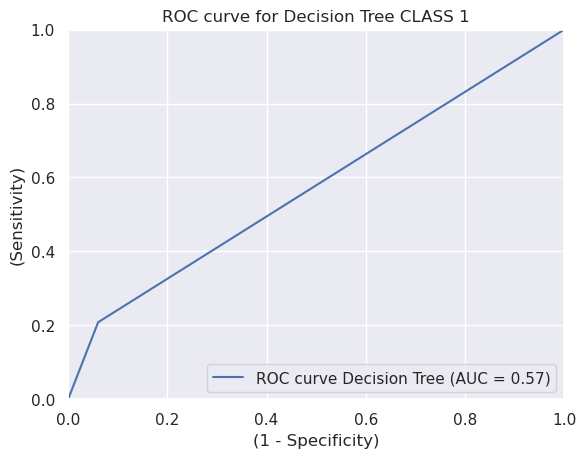

In [184]:
from sklearn.metrics import roc_curve, auc
dt_pred_prob = DTClassifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, dt_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve Decision Tree (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for Decision Tree CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

In [185]:
from sklearn.svm import SVC

#Support Vector Machine
SVMClassifier = SVC(kernel='rbf',probability=True,random_state=42, gamma='auto') 
SVMClassifier.fit(X_train, y_train) 
print("SVM Score :")
SVMClassifier.score(X_test,y_test)

SVM Score :


0.9409857328145266

In [186]:
SVM_y_predicted = SVMClassifier.predict(X_test)
class_names = np.unique(np.array(y_test))
confusion_matrix(y_test, SVM_y_predicted)

array([[2902,    0],
       [ 182,    0]])

In [187]:
from sklearn.metrics import classification_report
report = classification_report(y_test, SVM_y_predicted)
print(report)

scores = cross_val_score(SVMClassifier, X, y, cv=10, scoring='accuracy')
svm_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % svm_accuracy)

/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/melke/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2902
           1       0.00      0.00      0.00       182

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.89      0.94      0.91      3084

Cross-Validated Accuracy: 0.94


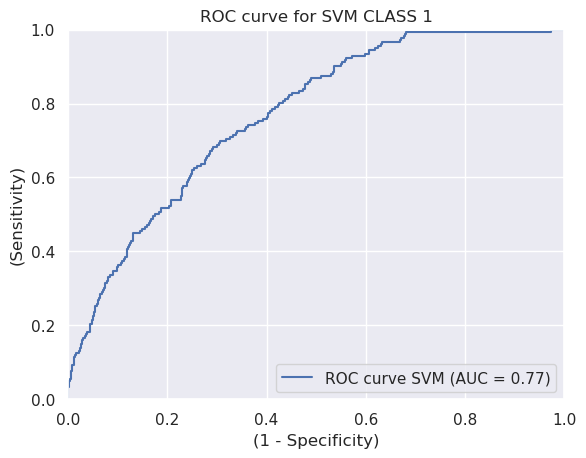

In [188]:
svm_pred_prob = SVMClassifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, svm_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve SVM (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for SVM CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

In [189]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#Random Forest
RFClassifier = RandomForestClassifier()
RFClassifier.fit(X_train, y_train) 
print("Random Forest Score :")
RFClassifier.score(X_test,y_test)

Random Forest Score :


0.9400129701686122

In [190]:
RF_y_predicted = RFClassifier.predict(X_test)
class_names = np.unique(np.array(y_test))
confusion_matrix(y_test, RF_y_predicted)

array([[2896,    6],
       [ 179,    3]])

In [191]:
from sklearn.metrics import classification_report
report = classification_report(y_test, RF_y_predicted)
print(report)

scores = cross_val_score(RFClassifier, X, y, cv=10, scoring='accuracy')
rf_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % rf_accuracy)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2902
           1       0.33      0.02      0.03       182

    accuracy                           0.94      3084
   macro avg       0.64      0.51      0.50      3084
weighted avg       0.91      0.94      0.91      3084

Cross-Validated Accuracy: 0.94


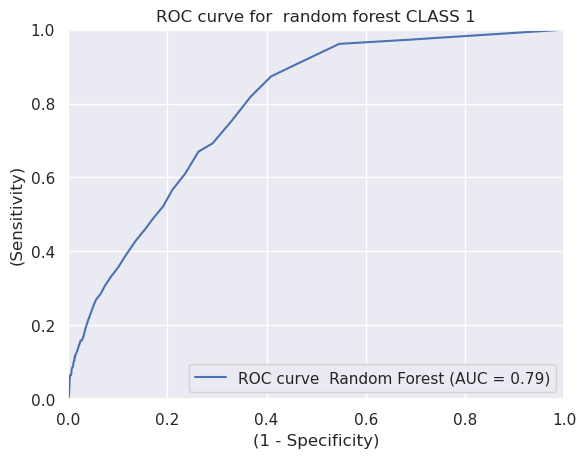

In [192]:
from sklearn.metrics import roc_curve, auc
rf_pred_prob = RFClassifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, rf_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve  Random Forest (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for  random forest CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

In [193]:
from sklearn.naive_bayes import BernoulliNB
#Naive Bayes Classifier
NBClassifier = BernoulliNB()
NBClassifier.fit(X_train, y_train)
print("Naive Bayes Classifier Score :")
NBClassifier.score(X_test,y_test)

Naive Bayes Classifier Score :


0.9260700389105059

In [194]:
nb_y_predicted = NBClassifier.predict(X_test)
report = classification_report(y_test, nb_y_predicted)

print(report)

scores = cross_val_score(NBClassifier, X, y, cv=10, scoring='accuracy')
nb_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % nb_accuracy)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2902
           1       0.21      0.09      0.13       182

    accuracy                           0.93      3084
   macro avg       0.58      0.54      0.55      3084
weighted avg       0.90      0.93      0.91      3084

Cross-Validated Accuracy: 0.92


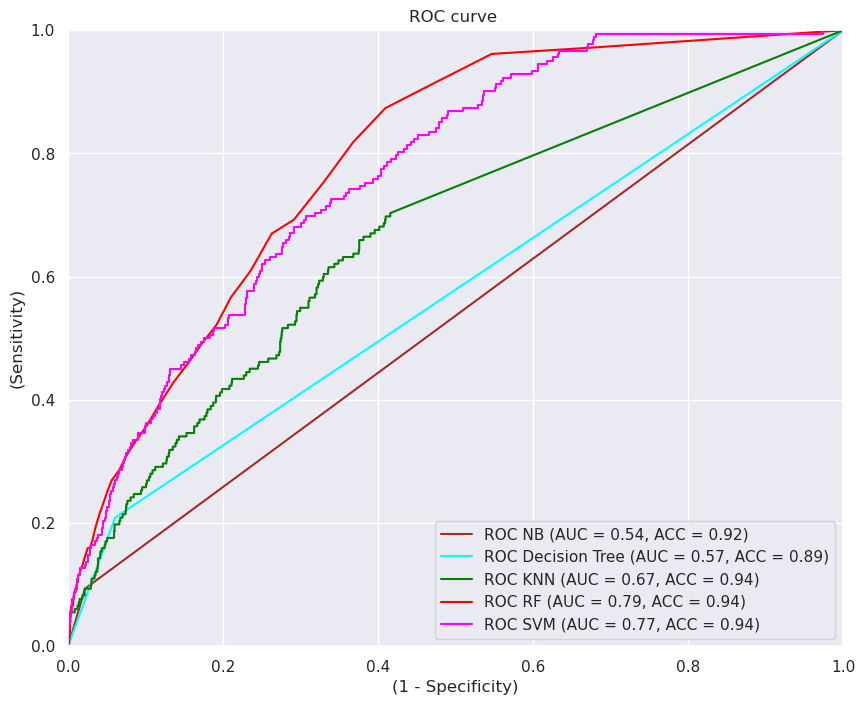

In [197]:
#Comparing the models
fpr9, tpr9, thresholds9 = roc_curve(y_test, nb_y_predicted)
roc_auc9 = auc(fpr9, tpr9)

fpr7, tpr7, thresholds7 = roc_curve(y_test, DT_y_predicted)
roc_auc7 = auc(fpr7, tpr7)

fpr5, tpr5, thresholds5 = roc_curve(y_test, knn_pred_prob)
roc_auc5 = auc(fpr5, tpr5)

fpr4, tpr4, thresholds4 = roc_curve(y_test, rf_pred_prob)
roc_auc4 = auc(fpr4, tpr4)

fpr1, tpr1, thresholds1 = roc_curve(y_test,svm_pred_prob)
roc_auc1 = auc(fpr1, tpr1)
lw = 2
plt.figure(figsize=(10, 8))
plt.plot(fpr9, tpr9,color='brown',label='ROC NB (AUC = %0.2f, ACC = %0.2f)' % (roc_auc9, nb_accuracy))
plt.plot(fpr7, tpr7,color='cyan',label='ROC Decision Tree (AUC = %0.2f, ACC = %0.2f)' % (roc_auc7, dt_accuracy))
plt.plot(fpr5, tpr5,color='green',label='ROC KNN (AUC = %0.2f, ACC = %0.2f)' % (roc_auc5, knn_accuracy))
plt.plot(fpr4, tpr4,color='red',label='ROC RF (AUC = %0.2f, ACC = %0.2f)' % (roc_auc4, rf_accuracy))
plt.plot(fpr1, tpr1,color='magenta',label='ROC SVM (AUC = %0.2f, ACC = %0.2f)' % (roc_auc1, svm_accuracy))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve ')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

####  Based solely on the AUC scores, the Random Forest (RF) model has the highest prediction performance among the models you listed with an AUC score of 0.79. However, it's worth noting that accuracy (ACC) is also an important metric to consider, and in this case, KNN, RF, and SVM have the same accuracy score of 0.94, which could be another important factor to consider when choosing the best model.

In [198]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'feature':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)
def plot_fi(fi): 
    return fi.plot('feature', 'imp', 'barh', figsize=(15,7), legend=False)

fi = rf_feat_importance(RFClassifier, X_train); fi[:15]

,feature,imp
4,Age,0.142362
0,WeekOfMonth,0.083014
2,WeekOfMonthClaimed,0.082017
7,DriverRating,0.078640
11,Year,0.055986
5,Fault,0.039592
38,PastNumberOfClaims_2 to 4,0.026907
57,NumberOfSuppliments_more than 5,0.026176
37,PastNumberOfClaims_1,0.026020
55,NumberOfSuppliments_1 to 2,0.024444


<AxesSubplot:ylabel='feature'>

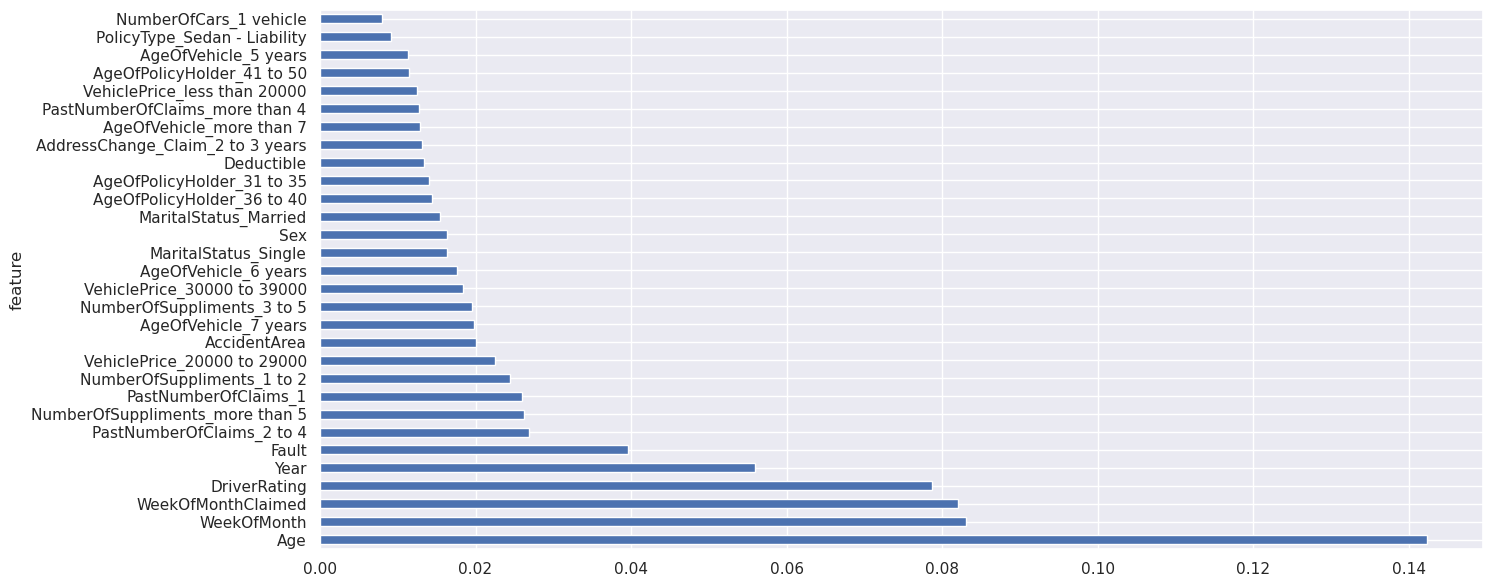

In [199]:
plot_fi(fi[:30])

In [200]:
test_target = y_test.copy()
test_target.reset_index(drop=True, inplace=True)
test_target = test_target.replace({1:'Y', 0:'N'})

predicted_target = RFClassifier.predict(X_test)
predicted_target = pd.Series(predicted_target).replace({1:'Y', 0:'N'})

In [201]:
ranks=pd.DataFrame(data=
                   { 
                       'RealClass':test_target, 
                       'PredictedClass':predicted_target,
                       'rank':rf_pred_prob
                   })
ranks.sort_values(by=['rank'],ascending=False,inplace=True)
ranks.head()

,RealClass,PredictedClass,rank
2188,Y,Y,0.64
360,N,Y,0.64
1112,N,Y,0.60
1771,N,Y,0.60
210,Y,Y,0.59


## Conclusion

####  In the comparison of the five models based on the given AUC and accuracy scores, we can conclude that the Random Forest (RF) model has the highest prediction performance with an AUC score of 0.79, while KNN, RF, and SVM have the same accuracy score of 0.94, which is the highest among all models. Therefore, choosing the best model depends on the specific requirements of the task at hand, and both AUC and accuracy should be considered together while selecting a model.
####  Based solely on the AUC scores, the Random Forest (RF) model has the highest prediction performance among the models you listed with an AUC score of 0.79